In [ ]:
!curl -L -o /content/indian-food-classification.zip \
  https://www.kaggle.com/api/v1/datasets/download/l33tc0d3r/indian-food-classification


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1515M  100 1515M    0     0   106M      0  0:00:14  0:00:14 --:--:--  122M


In [ ]:
!unzip /content/indian-food-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Food Classification/chapati/253.jpg  
  inflating: Food Classification/chapati/254.jpg  
  inflating: Food Classification/chapati/255.jpg  
  inflating: Food Classification/chapati/256.jpg  
  inflating: Food Classification/chapati/257.jpg  
  inflating: Food Classification/chapati/258.jpg  
  inflating: Food Classification/chapati/259.jpg  
  inflating: Food Classification/chapati/260.jpg  
  inflating: Food Classification/chapati/261.jpg  
  inflating: Food Classification/chapati/262.jpg  
  inflating: Food Classification/chapati/263.jpg  
  inflating: Food Classification/chapati/264.jpg  
  inflating: Food Classification/chapati/265.jpg  
  inflating: Food Classification/chapati/266.jpg  
  inflating: Food Classification/chapati/267.jpg  
  inflating: Food Classification/chapati/268.jpg  
  inflating: Food Classification/chapati/269.jpg  
  inflating: Food Classification/chapati/270.jpg  
  inflating: Food Classificatio

Key Project Characteristics:

20 different food image classes
Limited per-class image count
Goal: Automatic image classification

Recommended Techniques:

Data Augmentation Strategies


Rotation
Horizontal/vertical flips
Slight color/brightness variations
Zoom/crop transformations


Transfer Learning Approach


Use pre-trained models like:

ResNet50
VGG16
InceptionV3


Leverage feature extraction
Fine-tune last few layers


Model Development Steps


Data preprocessing
Split dataset (train/validation/test)
Apply data augmentation
Transfer learning model selection
Model training
Performance evaluation


Potential Advanced Goals


Visualization of classification regions
Develop object detection capabilities
Analyze model's decision-making process

In [ ]:
import os
import glob

# Specify the path to your main directory containing subfolders
main_directory = '/content/augmented_images'  # Change this to your directory

# Get a list of all subdirectories in the main directory
subdirectories = [d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

# Dictionary to store counts of images for each folder
image_counts = {}

# Loop through each subdirectory and count images
for subdir in subdirectories:
    # Construct the path to the subdirectory
    subdir_path = os.path.join(main_directory, subdir)

    # Use glob to find all image files (you can modify the extensions as needed)
    image_files = glob.glob(os.path.join(subdir_path, '*.[jp][pn]g')) + \
                  glob.glob(os.path.join(subdir_path, '*.[jp][pn]g')) + \
                  glob.glob(os.path.join(subdir_path, '*.[jp][pn]g'))  # Add more extensions if needed

    # Count the number of image files
    image_count = len(image_files)

    # Store the count in the dictionary
    image_counts[subdir] = image_count

# Print the results
for folder, count in image_counts.items():
    print(f"Folder '{folder}' contains {count} images.")


Folder 'chapati' contains 7434 images.
Folder 'pav_bhaji' contains 6354 images.
Folder 'kulfi' contains 4266 images.
Folder 'masala_dosa' contains 5598 images.
Folder 'momos' contains 5742 images.
Folder 'samosa' contains 4716 images.
Folder 'dal_makhani' contains 5778 images.
Folder 'pakode' contains 5004 images.
Folder 'fried_rice' contains 6390 images.
Folder 'idli' contains 5580 images.
Folder 'dhokla' contains 5202 images.
Folder 'burger' contains 5562 images.
Folder 'kaathi_rolls' contains 5274 images.
Folder 'chole_bhature' contains 7398 images.
Folder 'paani_puri' contains 2340 images.
Folder 'jalebi' contains 5346 images.
Folder 'chai' contains 6858 images.
Folder 'butter_naan' contains 5922 images.
Folder 'kadai_paneer' contains 7416 images.
Folder 'pizza' contains 4698 images.


In [ ]:
pwd

'/content'

In [ ]:
!pip install albumentations opencv-python matplotlib

In [ ]:
# Tensorflow-Keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define parameters values
IMG_SIZE = (256, 256)
VALID_SPLIT = 0.3
BATCH_SIZE = 32
SEED = 42
PATH = "/content/Food Classification"

# Get train image with generator
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Get validation image with generator
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Found 6269 files belonging to 20 classes.
Using 4389 files for training.
Found 6269 files belonging to 20 classes.
Using 1880 files for validation.


In [ ]:
# Get class names
classes = train_ds.class_names

In [ ]:
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

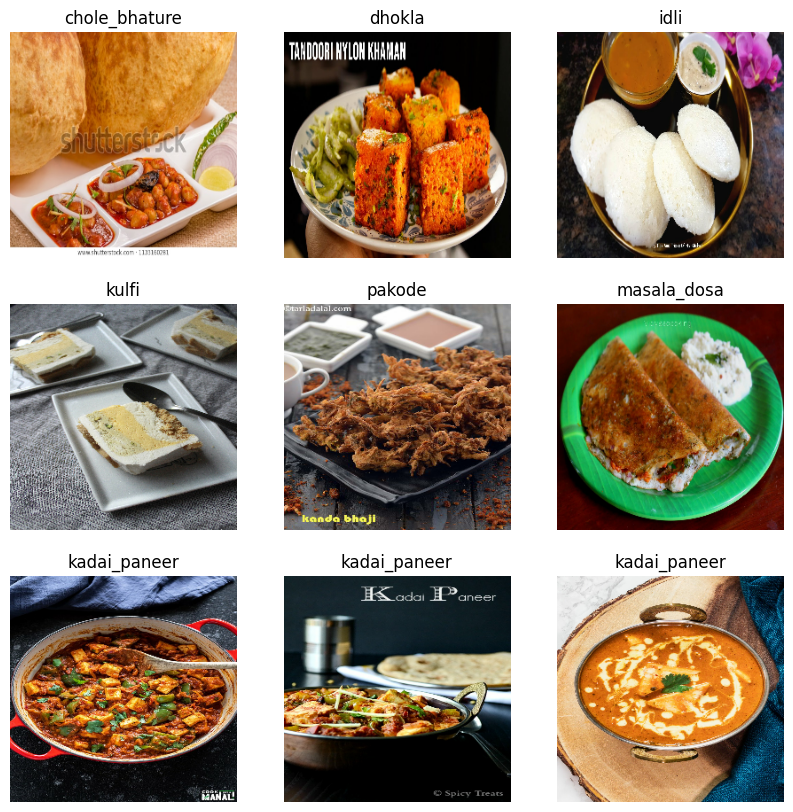

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define data augmentation using Keras layers directly
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# Apply transformation to train data
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
# Define the data augmentation block
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# Define the model
def make_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)  # Normalize pixel values to [0, 1]
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 512]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return tf.keras.Model(inputs, outputs)


In [ ]:

# Example usage
IMG_SIZE = (128, 128)  # Image size
classes = ['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']
model = make_model(input_shape=(128, 128, 3), num_classes=len(classes))


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 128, 128, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 64, 64, 64)     │          1,792 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 64, 64, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 64, 64, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 64, 64, 64)     │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 64, 64, 128)    │          8,896 │ activation_2[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 128)    │            512 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 64, 64, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 64, 64, 128)    │         17,664 │ activation_3[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 128)    │            512 │ separable_conv2d_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 32, 32, 128)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)       

 Total params: 2,105,108 (8.03 MB)

 Trainable params: 2,097,172 (8.00 MB)

 Non-trainable params: 7,936 (31.00 KB)

In [ ]:
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Food Classification',  # Replace with your dataset path
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Food Classification',  # Replace with your dataset path
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=batch_size,
)

# Prefetch for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Found 6269 files belonging to 20 classes.
Using 5016 files for training.
Found 6269 files belonging to 20 classes.
Using 1253 files for validation.
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 534ms/step - accuracy: 0.1762 - loss: 2.7935 - val_accuracy: 0.0519 - val_loss: 3.5342
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 120s 446ms/step - accuracy: 0.3180 - loss: 2.2194 - val_accuracy: 0.0599 - val_loss: 4.3837
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 496ms/step - accuracy: 0.3974 - loss: 1.9334 - val_accuracy: 0.0782 - val_loss: 5.8238
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 76s 458ms/step - accuracy: 0.4748 - loss: 1.7445 - val_accuracy: 0.3081 - val_loss: 2.5790
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 471ms/step - accuracy: 0.5374 - loss: 1.5360 - val_accuracy: 0.3815 - val_loss: 2.4299
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 440ms/step - accuracy: 0.5797 - loss: 1.4013 - val_accuracy: 0.4717 - val_loss: 1.9353
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 93s 510ms/step - accurac

In [ ]:

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 352ms/step - accuracy: 0.5655 - loss: 1.7237
Validation Loss: 1.8046116828918457
Validation Accuracy: 0.5618515610694885


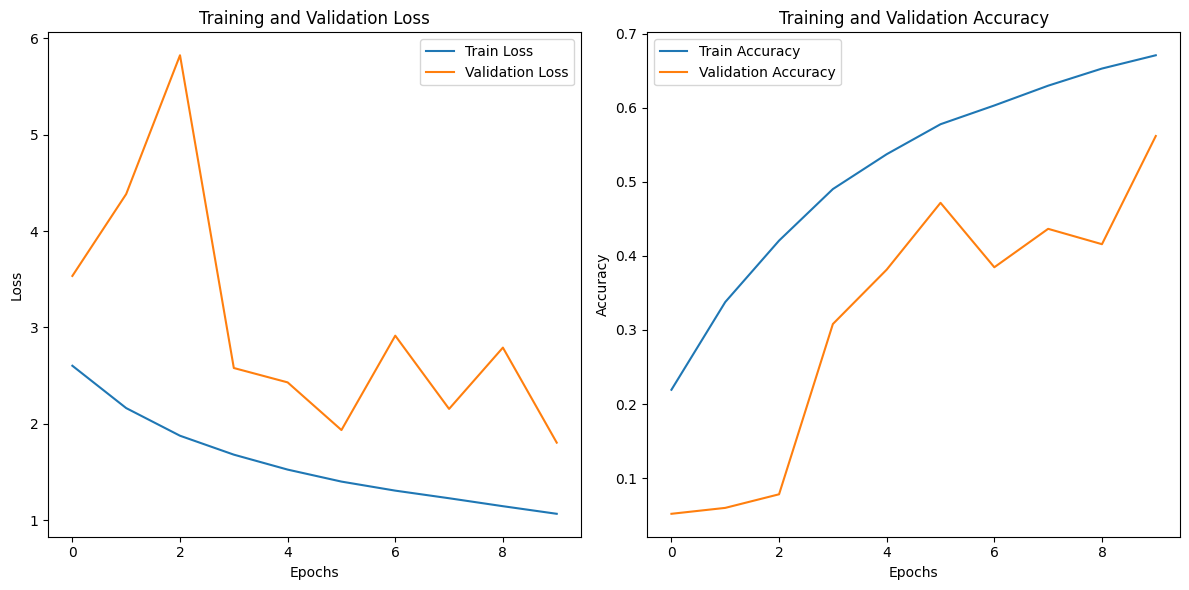

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy, label='Train Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
imgs = [
    "/content/Food Classification/burger/001.jpg",
    "/content/Food Classification/chai/001.jpg",
    "/content/Food Classification/dhokla/001.jpg",
    "/content/Food Classification/idli/001.jpg",
    "/content/Food Classification/kulfi/001.jpg"
]


In [ ]:
import pandas as pd

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


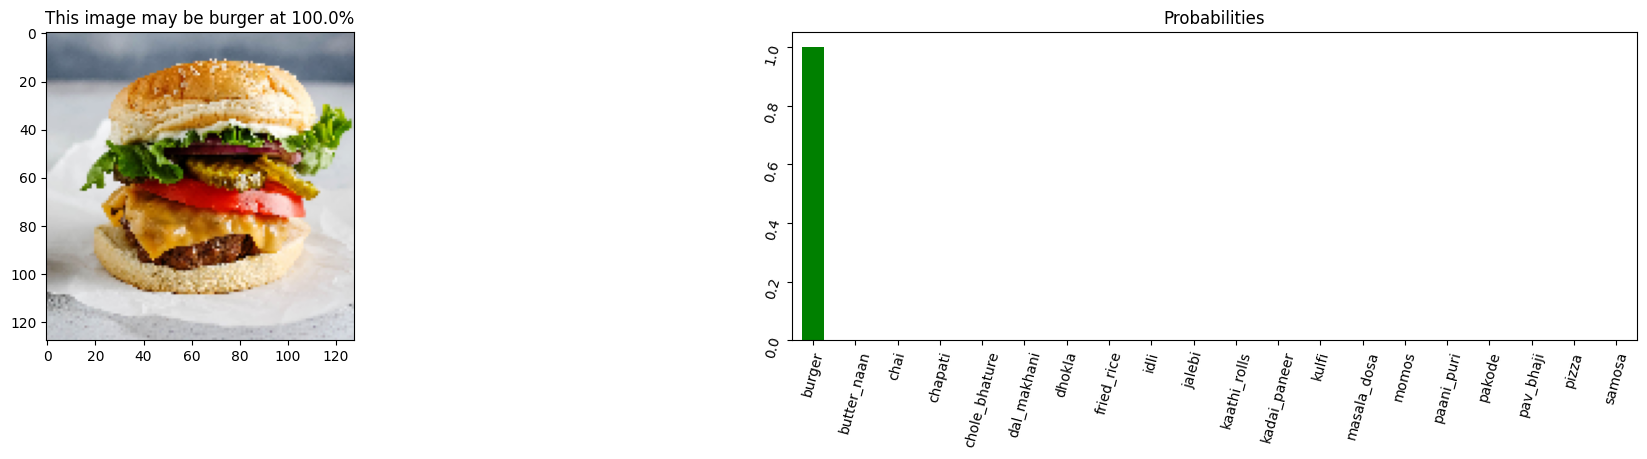

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


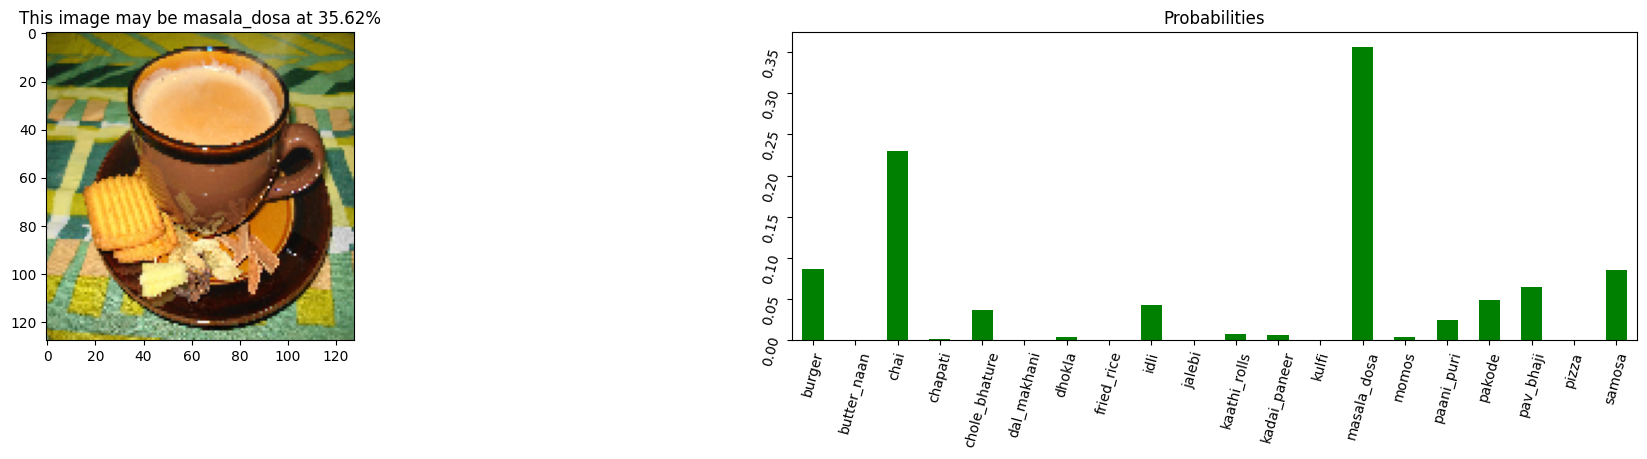

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


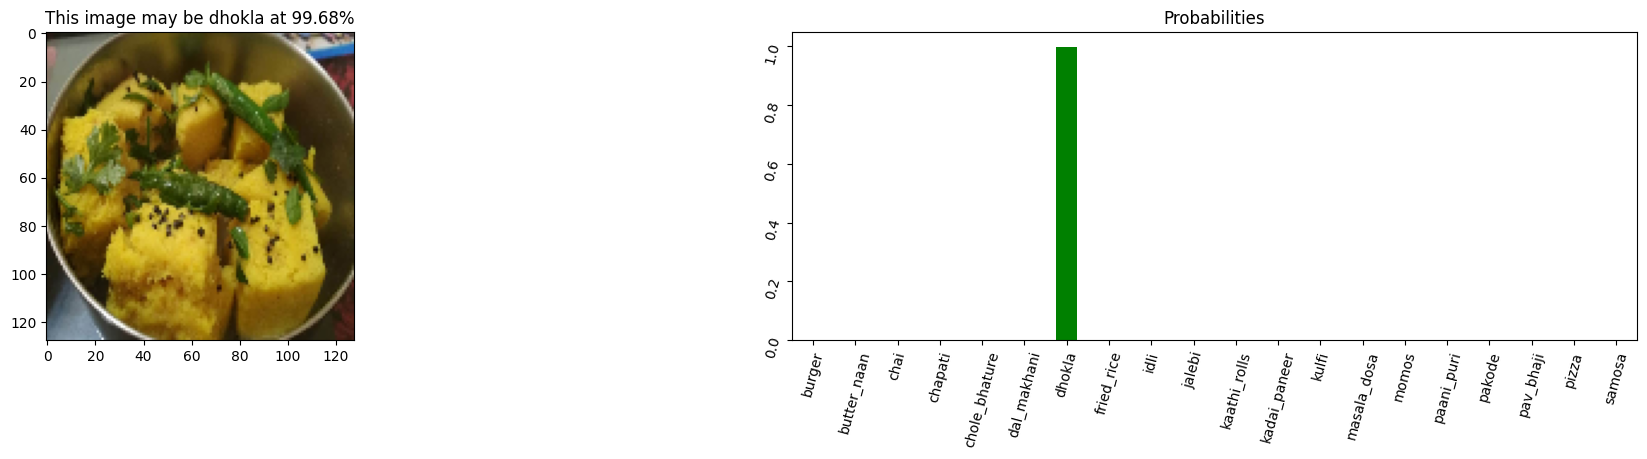

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


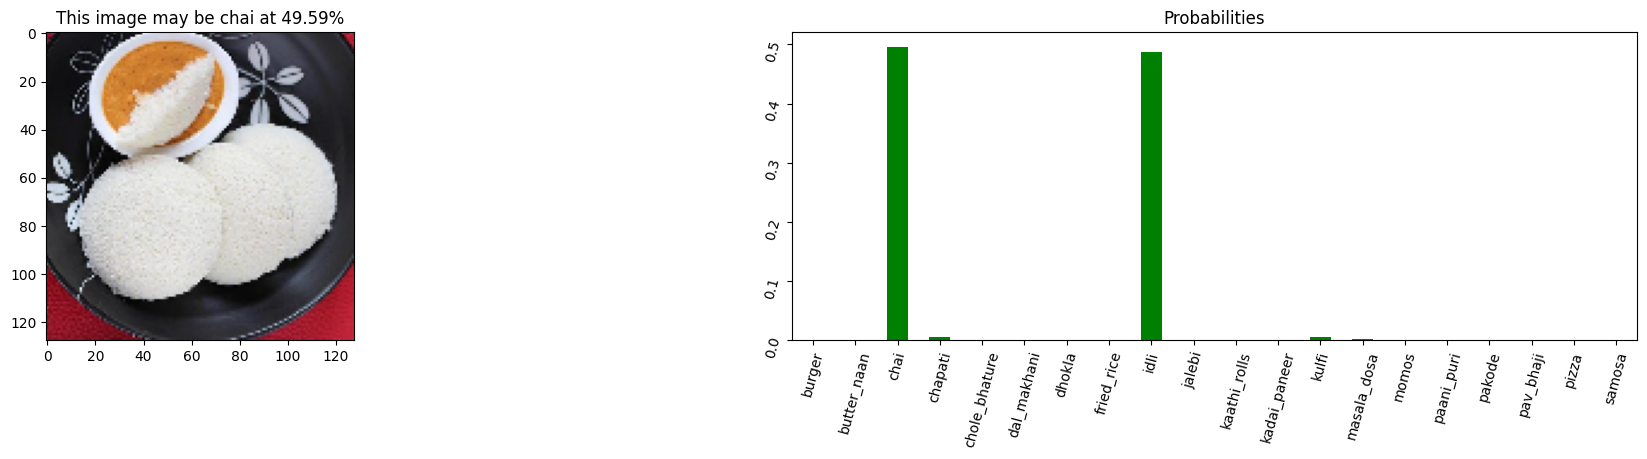

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


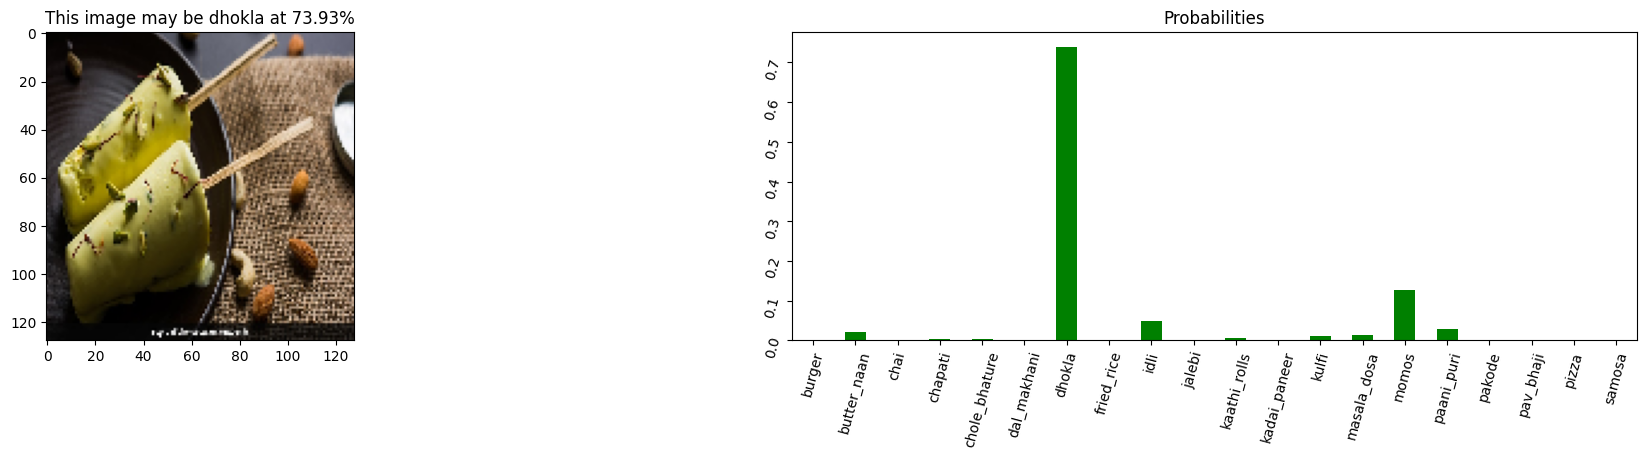

In [ ]:
for img in imgs:
    try:
        # Load the image
        raw_img = keras.preprocessing.image.load_img(img, target_size=IMG_SIZE)
    except:
        continue

    # Conver to to numpy array
    img_array = keras.preprocessing.image.img_to_array(raw_img)

    # Reshaping
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    # Make predictions
    predictions = model.predict(img_array)
    series      = pd.Series(predictions[0], index=classes)

    # Get score
    proba      = np.max(predictions)
    pred_class = classes[np.argmax(predictions)]

    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(24, 4))

    ax[0].imshow(raw_img)
    ax[0].title.set_text(f"This image may be {pred_class} at {round(proba * 100,2)}%")

    series.plot(kind='bar', ax=ax[1], color='green')
    ax[1].title.set_text("Probabilities")
    ax[1].tick_params(labelrotation=75)

    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
